In [1]:
!pip install numpy gym matplotlib

In [2]:
import gym
import numpy as np

In [3]:
import math

env = gym.make("CartPole-v0")

new_observation_shape = (20, 20, 20, 20)

bins = []
for i in range(4):
    item = np.linspace(
        env.observation_space.low[i] if (i == 0) or (i == 2) else -4,
        env.observation_space.high[i] if (i == 0) or (i == 2) else 4,
        num=new_observation_shape[i],
        endpoint=False)
    item = np.delete(item, 0)
    bins.append(item)
    print(bins[i])

# define function to convert to discrete state
def get_discrete_state(s):
    new_s = []
    for i in range(4):
        new_s.append(np.digitize(s[i], bins[i]))
    return new_s

[-4.32000017 -3.84000015 -3.36000013 -2.88000011 -2.4000001  -1.92000008
 -1.44000006 -0.96000004 -0.48000002  0.          0.48000002  0.96000004
  1.44000006  1.92000008  2.4000001   2.88000011  3.36000013  3.84000015
  4.32000017]
[-3.6 -3.2 -2.8 -2.4 -2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6
  2.   2.4  2.8  3.2  3.6]
[-0.37699113 -0.33510323 -0.29321532 -0.25132742 -0.20943952 -0.16755161
 -0.12566371 -0.08377581 -0.0418879   0.          0.0418879   0.08377581
  0.12566371  0.16755161  0.20943952  0.25132742  0.29321532  0.33510323
  0.37699113]
[-3.6 -3.2 -2.8 -2.4 -2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6
  2.   2.4  2.8  3.2  3.6]


In [4]:
q_table = np.zeros(new_observation_shape + (env.action_space.n,))
q_table.shape

(20, 20, 20, 20, 2)

In [5]:
gamma = 0.99
alpha = 0.1
epsilon = 1
epsilon_decay = epsilon / 4000

# pick up action from q-table with greedy exploration
def pick_sample(s, episode_num):
    # get optimal action,
    # but with greedy exploration (to prevent picking up same values in the first stage)
    if np.random.random() > epsilon:
        a = np.argmax(q_table[tuple(s)])
    else:
        a = np.random.randint(0, env.action_space.n)
    return a

env = gym.make("CartPole-v0")
reward_records = []
for i in range(6000):
    # Run episode till done
    done = False
    total_reward = 0
    s = env.reset()
    s_dis = get_discrete_state(s)
    while not done:
        a = pick_sample(s_dis, i)
        s, r, done, _ = env.step(a)
        s_dis_next = get_discrete_state(s)

        # Update Q-Table
        maxQ = np.max(q_table[tuple(s_dis_next)])
        q_table[tuple(s_dis)][a] += alpha * (r + gamma * maxQ - q_table[tuple(s_dis)][a])

        s_dis = s_dis_next
        total_reward += r

    # Update epsilon for each episode
    if epsilon - epsilon_decay >= 0:
        epsilon -= epsilon_decay
    
    # Record total rewards in episode (max 200)
    print("Run episode{} with rewards {}".format(i, total_reward), end="\r")
    reward_records.append(total_reward)

print("\nDone")
env.close()

Run episode5999 with rewards 200.0
Done


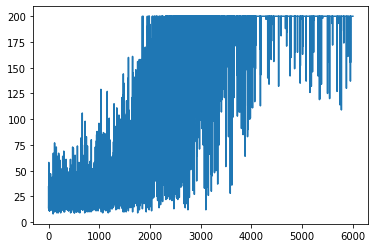

In [6]:
import matplotlib.pyplot as plt
plt.plot(reward_records)